In [5]:
import os
from vscworkflows.tools.optics import DielTensor, SolarCell

import numpy as np
import matplotlib, tikzplotlib
matplotlib.rcParams['text.usetex'] = True

import matplotlib.pyplot as plt
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)      # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

figures_dir = "../../figures/slme"

In [2]:
diel = DielTensor.from_file("data/CuInSe2_nedos6000.xml")

/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:155: UserWarning: Float overflow (*******) encountered in vasprun
  warnings.warn('Float overflow (*******) encountered in vasprun')


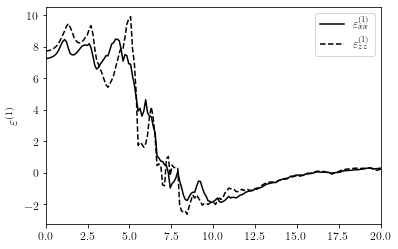

In [56]:
fig, ax = plt.subplots()

ax.plot(diel.energies[::5], diel.dielectric_tensor[::5, 0, 0].real, "k")
ax.plot(diel.energies[::5], diel.dielectric_tensor[::5, 2, 2].real, "k--")
ax.set_xlim([0, 20])
ax.legend([r"$\varepsilon^{(1)}_{xx}$", r"$\varepsilon^{(1)}_{zz}$"])
ax.set_ylabel(r"$\varepsilon^{(1)}$")

tikzplotlib.save(filepath=os.path.join(figures_dir, "diel_CuInSe2_real.tex"), 
                 add_axis_environment=False)

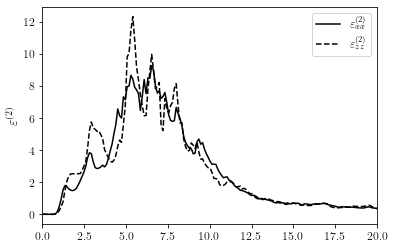

In [57]:
fig, ax = plt.subplots()

ax.plot(diel.energies[::5], diel.dielectric_tensor[::5, 0, 0].imag, "k")
ax.plot(diel.energies[::5], diel.dielectric_tensor[::5, 2, 2].imag, "k--")
ax.set_xlim([0, 20])
ax.legend([r"$\varepsilon^{(2)}_{xx}$", r"$\varepsilon^{(2)}_{zz}$"])
ax.set_ylabel(r"$\varepsilon^{(2)}$")

tikzplotlib.save(filepath=os.path.join(figures_dir, "diel_CuInSe2_imag.tex"), 
                 add_axis_environment=False)

## Shockley-Queisser limit

In [8]:
bandgaps = np.linspace(0.3, 3, 100)

sq_limit = [SolarCell.sq(bg)[0] for bg in bandgaps]

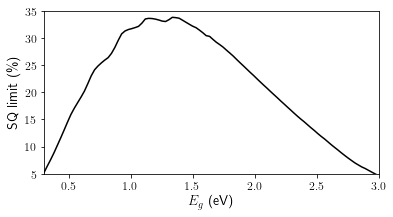

In [30]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(bandgaps, np.array(sq_limit) * 1e2, "k")
ax.set_xlim([0.3, 3])
ax.set_xlabel(r"$E_g$ (eV)")
ax.set_ylim([5, 35])
ax.set_ylabel("SQ limit (\%)")

tikzplotlib.save(filepath=os.path.join(figures_dir, "sq_limit_data.tex"), 
                 add_axis_environment=False)